# МОДЕЛИ СВОБОДНОГО И ОГРАНИЧЕННОГО РОСТА ПОПУЛЯЦИЙ

## Постановка задачи
В начальный момент времени **t<sub>0</sub>** количественный состав некоторого биологического вида равен **N<sub>0</sub>** единиц. Требуется сделать прогноз численности **N(t)** данной популяции при **t>=t<sub>0</sub>** для различных случаев: 
+ относительный темп прироста популяции не зависит от ее численности и равен постоянной величине **r** (свободный рост популяции),
+ относительный темп прироста популяции уменьшается линейно с увеличением ее численности и равен величине **r-bN(t)** (ограниченный рост популяции).
+ на относительный темп прироста популяции влияет наличие некоторого ресурса **F(t)** , который в свою очередь, зависит от величины **N(t)** (например, **F(t)** объём кормовой базы популяции).

С этой целью необходимо 
+ составить математическую модель свободного роста популяции в виде линейного дифференциального уравнения; 
+ составить математическую модель ограниченного роста популяции в виде  дифференциального уравнения Бернулли;
+ составить математическую модель роста популяции совместно с ограничивающим ресурсом в виде системы дифференциальных уравнений.
+ получить численное решение уравнений и привести графическую иллюстрацию изменения численности популяции для различных моделей;
+ сделать выводы по работе.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Моделирование развития изолированной популяции 
Предположим, что в момент времени **t=t<sub>0</sub>** , час, численность некоторого биологического вида составляет **N<sub>0</sub>** единиц. 

Пусть **N(t)** – запас этого вида в момент времени **t>=t<sub>0</sub>** . Тогда производная **N<sup>'</sup>(t)** есть темп прироста, а отношение **N<sup>'</sup>(t)/N(t)** представляет собой относительный темп прироста данного биологического вида.

Далее рассмотрим биологический вид со свободным (неограниченным) и ограниченным ростом. В первой модели допустим, что относительный темп прироста есть величина постоянная, не зависящая от текущего количества. Тогда **N<sup>'</sup>(t)/N(t) = r** является постоянной величиной. Отсюда следует, что справедливо дифференциальное уравнение **N<sup>'</sup>(t) = rN(t)**, представляющее собой математическую модель изменения численности популяции со свободным ростом. Очевидно, это есть модель Мальтуса, в которой коэффициент рождаемости **&alpha;(t) = r** является постоянной величиной, а коэффициент смертности равен нулю **&beta;(t) = 0**.

Общим решением этого уравнения является функция **N = Ce<sup>rt</sup>** , где **C** – произвольная постоянная величина. Согласно начальному условию при **t=t<sub>0</sub>** должно быть **N=N<sub>0</sub>** , и тогда **N<sub>0</sub> = Ce<sup>rt<sub>0</sub></sup>**. Следовательно,  . Окончательно получим, что численность популяции изменяется по экспоненциальному закону $$N(t) = N_0e^{r(t-t_0)}$$


[(0.0, 99.0), (5.0, 847.0497835288612)]

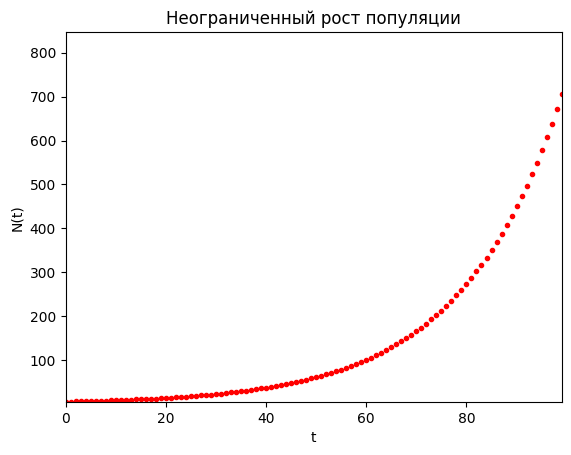

In [36]:
r = 0.05
t0 = 0
N0 = 5
tmax = 100
t = np.array([range(0, tmax)])
Nt = N0 * np.exp(r * (t - t0))
fig, ax = plt.subplots()
ax.plot(t, Nt, 'r.')
ax.set(xlabel='t', ylabel='N(t)',
       title='Неограниченный рост популяции')
ax.set(xlim=(np.min(t), np.max(t)), ylim=(np.min(Nt), np.max(Nt) * 1.2))

Очевидно, что неограниченно долго возрастать популяция не может. Простейший способ учета внутривидовой конкуренции связан с гипотезой о том, что коэффициент воспроизводства не есть константа, а зависит от численности популяции, спадая по мере ее роста. 

Во второй модели предположим, что относительный темп прироста популяции замедляется с ростом ее количества, т.е. отношение **N<sup>'</sup>(t)/N(t)** убывает с увеличением **N(t)**. 
Если это убывание линейно, то математически этот факт можно записать в виде  $$\frac{N^{'}(t)}{N(t)} = r-bN(t),\ где\ постоянная\ b > 0.$$ Отсюда следует, что имеет место дифференциальное уравнение $$N^{'}(t) = rN(t)(1 - \frac{N(t)}{k}),\ где\ k = \frac{r}{b}$$

Данное является частным случаем известного в математике дифференциального уравнения Бернулли. С учетом начального условия его решением будет функция $$N^{'}(t) = \frac{kN_0e^{r(t-t_0)}}{k+N_0(e^{r(t-t_0)}-1)}$$

In [33]:
k = 40
r = 0.05
t0 = 0
N0 = 5
tmax = 120
t = np.array([range(t0, tmax)])
Nt2 = (k * N0 * np.exp(r*(t-t0)))/(k + N0 * (np.exp(r * (t - t0)) - 1))
Nt1 = N0 * np.exp(r * t)

[(0.0, 119.0), (5.0, 78.56687085171032)]

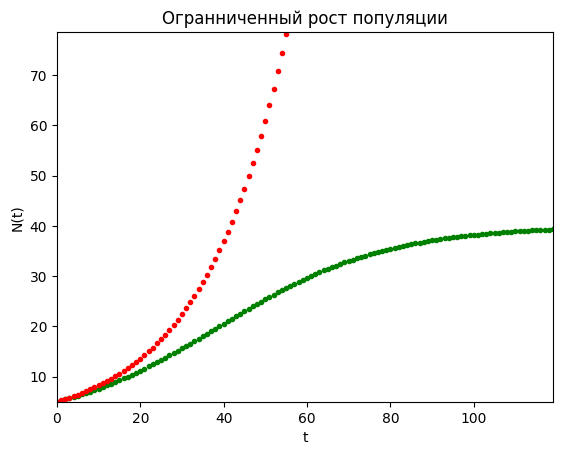

In [34]:
fig, ax = plt.subplots()
ax.plot(t, Nt2, 'g.', t, Nt1, 'r.')
ax.set(xlabel='t', ylabel='N(t)',
       title='Огранниченный рост популяции')
ax.set(xlim=(np.min(t), np.max(t)), ylim=(np.min(Nt2), np.max(Nt2) * 2))